In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [66]:
from gpx_to_csv import convert_all_gpx_to_csv, report
# gpx_dir = './data/gpx/'
# csv_dir = './data/csv/'
# convert_all_gpx_to_csv(gpx_dir, csv_dir)

In [5]:
data = pd.read_csv('./data/csv/bear-trail.csv')
data

,time,latitude,longitude,elevation,elevation_diff,distance,speed,cum_elevation,cum_distance,counter
0,2019-05-24 15:17:29+00:00,46.144479,10.965290,891.346,0.000,0.00,0.0000,0.000,0.00000,0
1,2019-05-24 15:17:49+00:00,46.151617,10.960616,1354.788,463.442,871.56,43.5780,463.442,0.87156,1
2,2019-05-24 15:18:09+00:00,46.151769,10.960604,1359.516,4.728,16.93,0.8465,468.170,0.88849,1
3,2019-05-24 15:18:29+00:00,46.151881,10.960633,1375.008,15.492,12.65,0.6325,483.662,0.90114,1
4,2019-05-24 15:18:49+00:00,46.151985,10.960997,1375.027,0.019,30.33,1.5165,483.681,0.93147,1
...,...,...,...,...,...,...,...,...,...,...
1760,2019-05-25 01:04:09+00:00,46.143240,10.964280,882.015,1.995,21.37,1.0685,-9.331,59.57414,6
1761,2019-05-25 01:04:29+00:00,46.143476,10.964383,888.096,6.081,27.42,1.3710,-3.250,59.60156,6
1762,2019-05-25 01:04:49+00:00,46.143630,10.964450,892.055,3.959,17.89,0.8945,0.709,59.61945,6
1763,2019-05-25 01:05:09+00:00,46.143950,10.964650,898.096,6.041,38.78,1.9390,6.750,59.65823,6


In [67]:
data.counter.unique()

array([0, 1, 2, 3, 4, 5, 6])

In [70]:
# Select relevant features (columns)
features = ['elevation_diff','distance', 'speed']

# Define the target column
target = 'counter'

# Split the data into features (X) and target (y)
X = data[features]
y = data[target]

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)


In [71]:
# Display the shape of the training and testing sets
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)

x_train shape: (1412, 3)
x_test shape: (353, 3)


In [72]:
model_lr = linear_model.LogisticRegression(
    multi_class='multinomial', solver='lbfgs', max_iter=120, verbose=True)
model_lr.fit(x_train, y_train)


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           28     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.74763D+03    |proj g|=  1.07693D+04

At iterate   50    f=  2.00511D+03    |proj g|=  8.52301D+02

At iterate  100    f=  1.77153D+03    |proj g|=  5.50016D+01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
   28    120    141      1     0     0   4.952D+02   1.768D+03
  F =   1768.4722642137456     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
 This problem is unconstrained.
/Users/nimakarimi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


LogisticRegression(max_iter=120, multi_class='multinomial', verbose=True)

In [73]:
model_lr.predict(x_test)

array([4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,

In [74]:
# accuracy
model_lr.score(x_test, y_test)

0.48441926345609065

In [75]:
predicted_output = model_lr.predict(x_test)
predicted_output

array([4, 4, 4, 2, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 2,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2,
       4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4,

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_output)
cm

array([[  6,   0,  29,   0,   0],
       [  0,   0,   3,   0,   0],
       [  6,   0, 165,   0,   1],
       [  0,   0,  35,   0,   0],
       [  7,   0, 101,   0,   0]])

Text(33.22222222222222, 0.5, 'Truth or Actual Value')

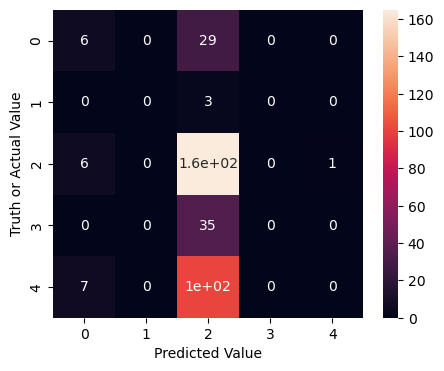

In [77]:
import seaborn as sn
from matplotlib import pyplot as plt
plt.figure(figsize=(5, 4))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted Value')
plt.ylabel('Truth or Actual Value')

## Random Forest


In [78]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier
model_rf = RandomForestClassifier(random_state=42)

# Train the model
model_rf.fit(x_train, y_train)

# Evaluate the model on the testing set
accuracy = model_rf.score(x_test, y_test)
print('RF Model Accuracy:', accuracy)


RF Model Accuracy: 0.5014164305949008


In [79]:
predicted_output = model_rf.predict(x_test)

# accuracy
model_rf.score(x_test, y_test)


0.5014164305949008

In [80]:
from sklearn.metrics import classification_report, confusion_matrix
# Print classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, predicted_output))
print("Confusion Matrix:\n", confusion_matrix(y_test, predicted_output))


Classification Report:
               precision    recall  f1-score   support

           2       0.33      0.26      0.29        35
           3       0.00      0.00      0.00         3
           4       0.59      0.65      0.62       172
           5       0.29      0.20      0.24        35
           6       0.44      0.45      0.45       108

    accuracy                           0.50       353
   macro avg       0.33      0.31      0.32       353
weighted avg       0.49      0.50      0.49       353

Confusion Matrix:
 [[  9   0  16   3   7]
 [  0   0   2   0   1]
 [ 10   1 112   7  42]
 [  1   0  15   7  12]
 [  7   1  44   7  49]]


In [81]:
new_data = pd.read_csv('./data/csv/alpes-7.csv')
print('before \n', new_data)

# Use the trained model to predict
predicted_lift_usage = model_lr.predict(new_data[features])

# Add the predictions as a new column to the new_data DataFrame
new_data['predicted_lift_usage_lr'] = predicted_lift_usage

# Display the new_data DataFrame with predictions
print(new_data.predicted_lift_usage_lr.describe())
new_data

before 
                           time   latitude  longitude  elevation  \
0    2014-09-17 06:20:16+00:00  46.303075  10.981860    754.844   
1    2014-09-17 06:26:00+00:00  46.301365  10.980137    760.105   
2    2014-09-17 06:26:56+00:00  46.301606  10.979870    761.515   
3    2014-09-17 06:29:49+00:00  46.300925  10.978946    764.907   
4    2014-09-17 06:30:23+00:00  46.300270  10.978331    769.711   
..                         ...        ...        ...        ...   
495  2014-09-17 17:01:35+00:00  46.362461  10.901419    787.023   
496  2014-09-17 17:02:35+00:00  46.363349  10.898631    787.083   
497  2014-09-17 17:03:12+00:00  46.363770  10.896750    788.911   
498  2014-09-17 17:03:32+00:00  46.363606  10.896120    789.407   
499  2014-09-17 17:25:40+00:00  46.363762  10.895565    790.379   

     elevation_diff  distance     speed  cum_elevation  cum_distance  counter  
0             0.000      0.00  0.000000          0.000       0.00000        0  
1             5.261    231

,time,latitude,longitude,elevation,elevation_diff,distance,speed,cum_elevation,cum_distance,counter,predicted_lift_usage_lr
0,2014-09-17 06:20:16+00:00,46.303075,10.981860,754.844,0.000,0.00,0.000000,0.000,0.00000,0,4
1,2014-09-17 06:26:00+00:00,46.301365,10.980137,760.105,5.261,231.68,0.673488,5.261,0.23168,0,2
2,2014-09-17 06:26:56+00:00,46.301606,10.979870,761.515,1.410,33.75,0.602679,6.671,0.26543,0,4
3,2014-09-17 06:29:49+00:00,46.300925,10.978946,764.907,3.392,103.79,0.599942,10.063,0.36922,0,2
4,2014-09-17 06:30:23+00:00,46.300270,10.978331,769.711,4.804,86.81,2.553235,14.867,0.45603,0,4
...,...,...,...,...,...,...,...,...,...,...,...
495,2014-09-17 17:01:35+00:00,46.362461,10.901419,787.023,12.427,589.96,3.597317,32.179,46.29978,0,2
496,2014-09-17 17:02:35+00:00,46.363349,10.898631,787.083,0.060,235.62,3.927000,32.239,46.53540,0,2
497,2014-09-17 17:03:12+00:00,46.363770,10.896750,788.911,1.828,151.74,4.101081,34.067,46.68714,0,2
498,2014-09-17 17:03:32+00:00,46.363606,10.896120,789.407,0.496,51.67,2.583500,34.563,46.73881,0,4
